In [9]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('cb_multi_labeled_balanced.csv')

# View the first few rows and the structure of the data
print(df.head())
print(df.info())
print(df.columns)

                                                text              label
0  @ZubearSays Any real nigga isn't letting this ...     ethnicity/race
1  @MoradoSkittle @prolifejewess @DAConsult @Kell...  not_cyberbullying
2        the only thing i wish, i wish a nigga would     ethnicity/race
3  You saudias are not friends of Muslim idiots c...           religion
4  @JaydenT2399 @TractorLaw @holmes_gael @erconge...           religion
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99990 entries, 0 to 99989
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    99990 non-null  object
 1   label   99990 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB
None
Index(['text', 'label'], dtype='object')


In [11]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data (run these once)
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Remove @names (mentions)
    text = re.sub(r'@\w+', '', text)

    # Convert to lowercase
    text = text.lower()

    # Remove punctuation and non-alphabetic characters
    text = re.sub(r'[^a-z\s]', '', text)

    # Remove extra whitespace
    text = text.strip()

    # Tokenize by splitting on whitespace
    tokens = text.split()

    # Remove stopwords and lemmatize tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    # Join tokens back into a string
    return " ".join(tokens)

# Apply text cleaning to the 'text' column of your DataFrame
df['clean_text'] = df['text'].apply(clean_text)

# Inspect the cleaned text
print(df[['clean_text']].head())


[nltk_data] Downloading package stopwords to C:\Users\jeevan
[nltk_data]     lal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\jeevan
[nltk_data]     lal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                          clean_text
0                     real nigga isnt letting happen
1  didnt even mention mexico u far safest place e...
2                        thing wish wish nigga would
3       saudias friend muslim idiot cheapless people
4  yet maga want judah christian muslim believe s...


In [12]:
# Check for missing values in key columns
print(df.isnull().sum())

df = df.dropna(subset=['text'])

# Remove duplicate rows if any
df = df.drop_duplicates()

print("After cleaning, dataset shape:", df.shape)


text          0
label         0
clean_text    0
dtype: int64
After cleaning, dataset shape: (99989, 3)


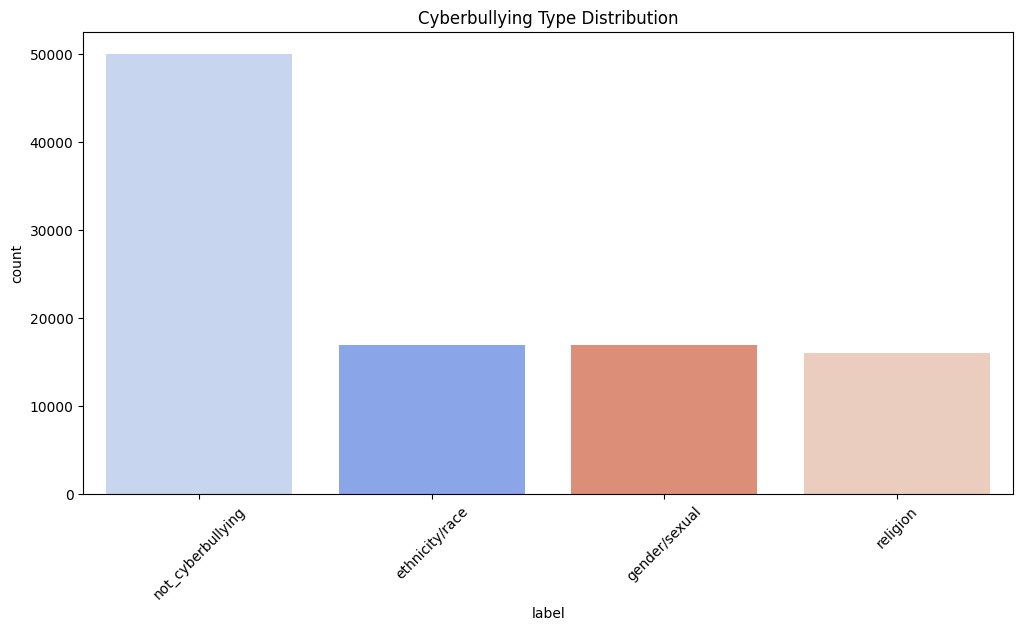

In [13]:
# Perform Exploratory Data Analysis (EDA)
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="label", order=df["label"].value_counts().index, hue="label", palette="coolwarm", legend=False)
plt.title("Cyberbullying Type Distribution")
plt.xticks(rotation=45)
plt.show()


In [14]:
from sklearn.preprocessing import LabelEncoder

# 1. Label-encode the multi-class labels
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])

# 2. Create a binary label column
#    0 -> 'not_cyberbullying'
#    1 -> all other labels
df['binary_label'] = df['label'].apply(lambda x: 0 if x == 'not_cyberbullying' else 1)

# Inspect the results
print(df[['label', 'binary_label']].head())


               label  binary_label
0     ethnicity/race             1
1  not_cyberbullying             0
2     ethnicity/race             1
3           religion             1
4           religion             1


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the cleaned text data
X = vectorizer.fit_transform(df['clean_text'])

# Labels
y = df['binary_label']
y

0        1
1        0
2        1
3        1
4        1
        ..
99985    0
99986    0
99987    1
99988    1
99989    0
Name: binary_label, Length: 99989, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (79991, 5000)
Test set size: (19998, 5000)


In [17]:
# Drop them in-place (this modifies 'df' directly)
df.drop(columns=['text', 'label', 'label_encoded'], inplace=True)

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (79991, 5000)
Test set size: (19998, 5000)


In [19]:
counts = df['binary_label'].value_counts().to_dict()
print("Non-cyberbullying (0):", counts.get(0, 0))
print("Cyberbullying (1):", counts.get(1, 0))


Non-cyberbullying (0): 49999
Cyberbullying (1): 49990


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Load and preprocess your data
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_text'])
y = df['binary_label']
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Choose logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Evaluation
print("Accuracy score:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy score: 0.9922992299229924
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     10124
           1       1.00      0.99      0.99      9874

    accuracy                           0.99     19998
   macro avg       0.99      0.99      0.99     19998
weighted avg       0.99      0.99      0.99     19998

[[10114    10]
 [  144  9730]]


In [20]:
import pickle

# Save the TF-IDF vectorizer
with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

# Save the Logistic Regression model
with open("cyberbully_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("Model and Vectorizer saved!")


Model and Vectorizer saved!


In [15]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
import pickle  # for saving the model

# Load dataset (you can replace this with your own dataset)
iris = load_iris()
X, y = iris.data, iris.target

# Create and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy score:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy score: 0.9957995799579958
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     10124
           1       1.00      0.99      1.00      9874

    accuracy                           1.00     19998
   macro avg       1.00      1.00      1.00     19998
weighted avg       1.00      1.00      1.00     19998

[[10098    26]
 [   58  9816]]


In [16]:
# Save the trained model to a file
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved as 'random_forest_model.pkl'")


Model saved as 'random_forest_model.pkl'


In [17]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import load_model
print(1)


1


In [20]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Tokenize and convert text to sequences
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['clean_text'])
sequences = tokenizer.texts_to_sequences(df['clean_text'])
sequences
# Pad sequences to ensure equal length
max_sequence_length = 100  # You can adjust based on your dataset
X = pad_sequences(sequences, maxlen=max_sequence_length)

# Labels
y = df['binary_label']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define the model
# model = Sequential()

# # Embedding layer
# model.add(Embedding(input_dim=5000, output_dim=128, input_length=max_sequence_length))

# # LSTM layer
# model.add(LSTM(50, activation='relu'))

# # Output layer
# model.add(Dense(1, activation='sigmoid'))

# # Compile model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Fit model
# model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# model.save('lstm_text_model.h5')


In [24]:
from tensorflow.keras.models import load_model

loaded_model = load_model('lstm_text_model.h5')\
# Evaluate or predict
loss, accuracy = loaded_model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')


625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 25ms/step - accuracy: 0.9943 - loss: 0.0474
Test Accuracy: 0.9954495429992676


In [25]:
sample_text = ["idiot bitch"]
# Tokenize (use the same tokenizer fitted earlier)
sample_sequence = tokenizer.texts_to_sequences(sample_text)

# Pad sequence (use the same max_sequence_length)
sample_padded = pad_sequences(sample_sequence, maxlen=max_sequence_length)

print(sample_padded)
prediction = loaded_model.predict(sample_padded)
print("Prediction:", prediction)


[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0 29  1]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step
Prediction: [[1.]]


In [ ]:
from sklearn.svm import SVC
import joblib

size = 10000  # Reduce dataset 
X_sample = X_train[:size]
y_sample = y_train[:size]
 bn 
svm_model = SVC(kernel="linear", probability=True)
svm_model.fit(X_sample, y_sample)

# Save the model using joblib
joblib.dump(svm_model, "svm_model.pkl")
print("✅ SVM Model retrained & saved successfully!")


✅ SVM Model retrained & saved successfully!


In [16]:

import joblib
import numpy as np

# Load SVM model
svm_model = joblib.load("svm_model.pkl")

# Load vectorizer
vectorizer = joblib.load("tfidf_vectorizer.pkl")

# Test with sample text
sample_text = ["This is a test message"]
text_vectorized = vectorizer.transform(sample_text)

# Get prediction
prediction = svm_model.predict(text_vectorized)
print("SVM Prediction Output:", prediction)

# Check probability prediction
if hasattr(svm_model, "predict_proba"):
    confidence = svm_model.predict_proba(text_vectorized)[0]
    print("SVM Probability Output:", confidence)


SVM Prediction Output: ['']
SVM Probability Output: [5.02079667e-05 1.00211482e-04 1.00211482e-04 ... 1.00211292e-04
 1.00211292e-04 1.00211292e-04]


In [17]:
print("SVM Model Classes:", svm_model.classes_)


SVM Model Classes: [''
 'abb chowdhdryu r grey matter dried talk paks islamic terrorism amp consequencesits pakis r void humanity amp curse religion worldwidestop intervening kashmir stop terror outfitsshame none make sense u humanityoverpakterror'
 'abc islam muslim fighterswar monger discusting distructive isi abc u put war mongering passage together quran u come allah perfect muslim would terrorist isi r allah army taliban hamas hezboallah'
 ... 'zesty bartender start throwing free shot time shoddy head'
 'zion played game season yet nobody talking star like steph interesting'
 'zionist proisrael without antimuslim antiarab xenophobe idiot']


In [13]:
from sklearn.svm import SVC
import joblib
from sklearn.preprocessing import LabelEncoder

# Encode labels correctly (Convert text labels to numeric)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Train SVM with probability enabled
svm_model = SVC(kernel="linear", probability=True)
svm_model.fit(X_train, y_train_encoded)

# Save model and label encoder
joblib.dump(svm_model, "svm_model.pkl")
joblib.dump(label_encoder, "label_encoder.pkl")

print("✅ Model retrained with correct numeric labels!")


✅ Model retrained with correct numeric labels!


In [14]:
print("SVM Model Classes:", svm_model.classes_)


SVM Model Classes: [0 1]


In [15]:
# Sample text input for testing
sample_text = ["You are so dumb and annoying!"]

# Vectorize text input
sample_vectorized = vectorizer.transform(sample_text)

# Make prediction
prediction = svm_model.predict(sample_vectorized)
probability = svm_model.predict_proba(sample_vectorized)

# Display results
print(f"Prediction: {prediction}")  
print(f"Probability: {probability}")  # Probability scores for both classes


Prediction: [1]
Probability: [[3.0000009e-14 1.0000000e+00]]
